# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools

from mpl_toolkits.mplot3d import Axes3D

In [460]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

In [461]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


In [462]:
missing_data = X_train.isnull().sum()
missing_results = []

for column, missing_count in missing_data.items():
    if missing_count > 0:
        if X_train[column].dtype in ['float64', 'int64']:
            # для числовых медиана
            fill_value = X_train[column].median()
        else:
            # для категориальных мода
            fill_value = X_train[column].mode()[0]

        X_train[column] = X_train[column].fillna(fill_value)
        missing_results.append(
            f"{column} - {missing_count} - Заменено на {'медиану' if X_train[column].dtype in ['float64', 'int64'] else 'моду'} ({fill_value})"
        )
    else:
        missing_results.append(f"{column} - {missing_count} - Пропусков нет")

print(*missing_results, sep='\n')


school - 0 - Пропусков нет
sex - 0 - Пропусков нет
age - 28 - Заменено на медиану (17.0)
address - 5 - Заменено на моду (U)
famsize - 0 - Пропусков нет
Pstatus - 0 - Пропусков нет
Medu - 0 - Пропусков нет
Fedu - 0 - Пропусков нет
Mjob - 0 - Пропусков нет
Fjob - 0 - Пропусков нет
reason - 0 - Пропусков нет
guardian - 0 - Пропусков нет
traveltime - 0 - Пропусков нет
studytime - 0 - Пропусков нет
failures - 0 - Пропусков нет
schoolsup - 0 - Пропусков нет
famsup - 0 - Пропусков нет
paid - 0 - Пропусков нет
activities - 0 - Пропусков нет
nursery - 0 - Пропусков нет
higher - 0 - Пропусков нет
internet - 0 - Пропусков нет
romantic - 0 - Пропусков нет
famrel - 0 - Пропусков нет
freetime - 0 - Пропусков нет
goout - 0 - Пропусков нет
Dalc - 0 - Пропусков нет
Walc - 0 - Пропусков нет
health - 0 - Пропусков нет
absences - 0 - Пропусков нет
G3 - 0 - Пропусков нет


In [463]:
print(X_train.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  454.000000  454.000000  454.000000  454.000000  454.000000  454.000000   
mean    17.865639    2.493392    2.297357    1.599119    1.889868    0.229075   
std     12.998455    1.121218    1.076394    0.776361    0.811742    0.598335   
min     -1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max    181.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  454.000000  454.000000  454.000000  454.000000  454.000000  454.000000   
mean     3.909692    3.182819    3.222467    1.519824    2.303965    3.541850   
std      0.950540    1.0773

In [464]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         454 non-null    object 
 2   age         454 non-null    float64
 3   address     454 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Fedu        454 non-null    int64  
 8   Mjob        454 non-null    object 
 9   Fjob        454 non-null    object 
 10  reason      454 non-null    object 
 11  guardian    454 non-null    object 
 12  traveltime  454 non-null    int64  
 13  studytime   454 non-null    int64  
 14  failures    454 non-null    int64  
 15  schoolsup   454 non-null    object 
 16  famsup      454 non-null    object 
 17  paid        454 non-null    object 
 18  activities  454 non-null    object 
 19  nursery     454 non-null    o

In [465]:
X_train.select_dtypes(include=['object']).columns.tolist()

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

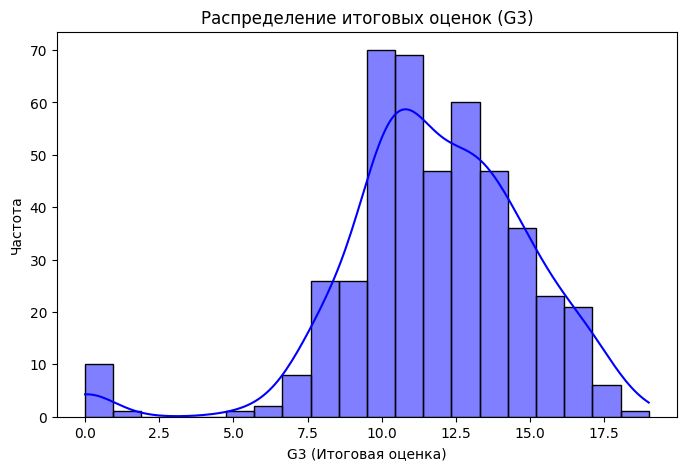

In [466]:
# categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
# X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# print(X_train.isnull().sum().sum())

plt.figure(figsize=(8, 5))
sns.histplot(X_train['G3'], bins=20, kde=True, color='blue')
plt.title('Распределение итоговых оценок (G3)')
plt.xlabel('G3 (Итоговая оценка)')
plt.ylabel('Частота')
plt.show()


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_80373/2116238358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x='sex', palette='pastel')


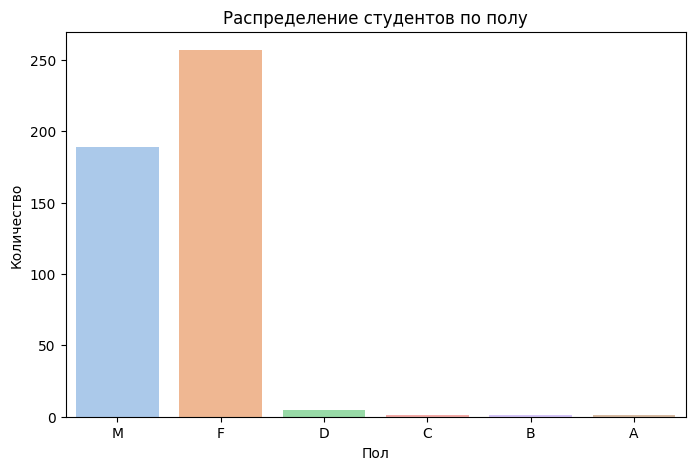

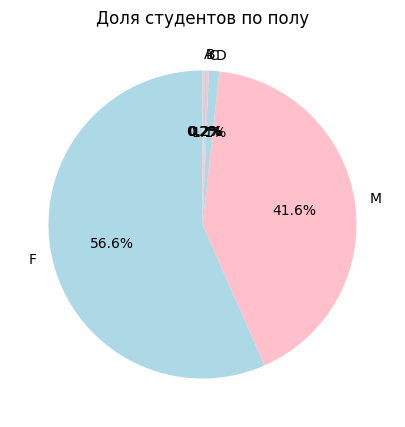

In [467]:
plt.figure(figsize=(8, 5))
sns.countplot(data=X_train, x='sex', palette='pastel')
plt.title('Распределение студентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 5))
X_train['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Доля студентов по полу')
plt.ylabel('')
plt.show()


## Характеристика: "Age"

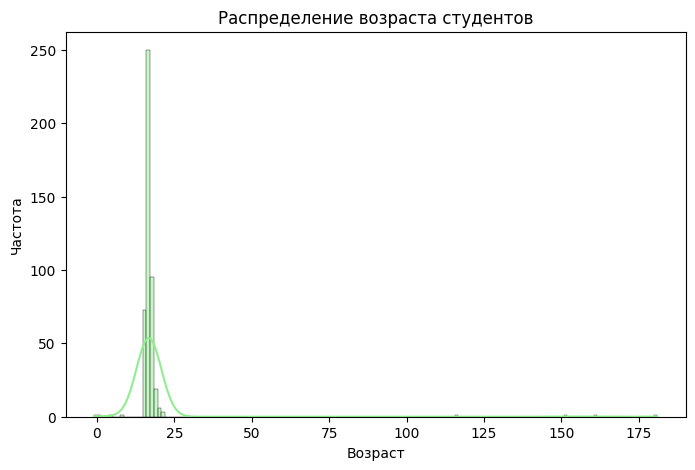

In [468]:
plt.figure(figsize=(8, 5))
sns.histplot(X_train['age'], bins=150, kde=True, color='lightgreen')
plt.title('Распределение возраста студентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


In [469]:
age_table = X_train['age'].value_counts().reset_index()
age_table = age_table.sort_values(by='count', ascending=False).reset_index(drop=True)
print(age_table)

      age  count
0    17.0    139
1    16.0    111
2    18.0     95
3    15.0     73
4    19.0     19
5    20.0      6
6    21.0      2
7   161.0      1
8   181.0      1
9   151.0      1
10  116.0      1
11   22.0      1
12   -1.0      1
13    1.0      1
14    5.0      1
15    8.0      1


## Характеристика: "Weekly study time"

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_80373/2110323490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x='studytime', palette='coolwarm')


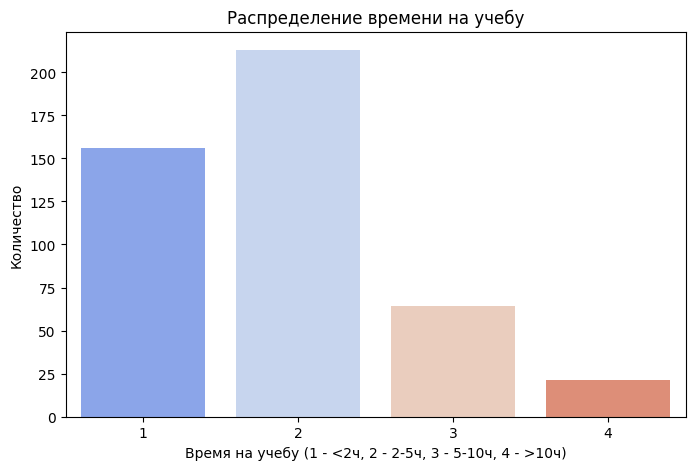

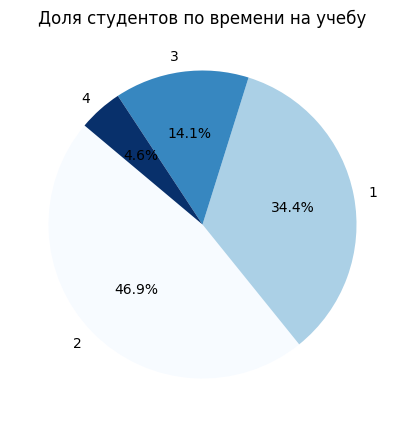

In [470]:
plt.figure(figsize=(8, 5))
sns.countplot(data=X_train, x='studytime', palette='coolwarm')
plt.title('Распределение времени на учебу')
plt.xlabel('Время на учебу (1 - <2ч, 2 - 2-5ч, 3 - 5-10ч, 4 - >10ч)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 5))
X_train['studytime'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='Blues')
plt.title('Доля студентов по времени на учебу')
plt.ylabel('')
plt.show()


## Характеристика: "Romantic Relationship"

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_80373/2210377409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x='romantic', palette='Set2')


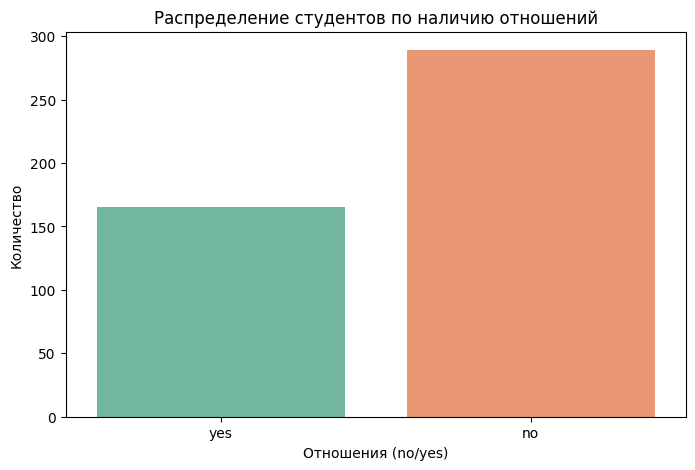

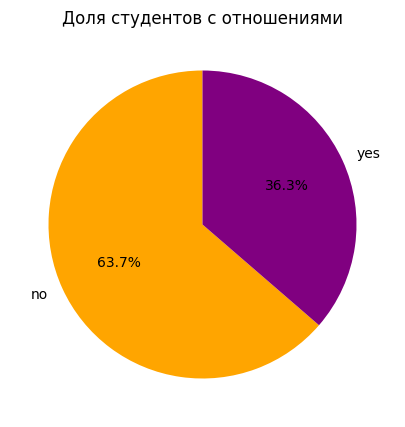

In [471]:
plt.figure(figsize=(8, 5))
sns.countplot(data=X_train, x='romantic', palette='Set2')
plt.title('Распределение студентов по наличию отношений')
plt.xlabel('Отношения (no/yes)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 5))
X_train['romantic'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'purple'])
plt.title('Доля студентов с отношениями')
plt.ylabel('')
plt.show()


## Характеристика: "Alcohol Consumption"

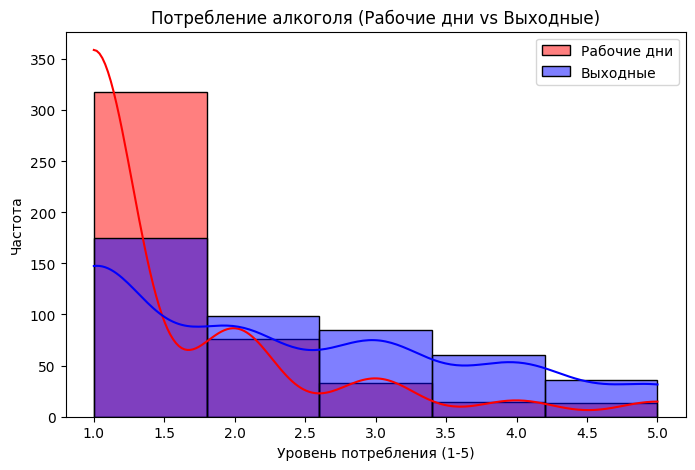

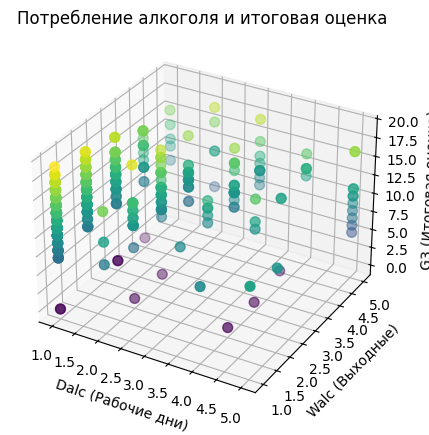

In [472]:
plt.figure(figsize=(8, 5))
sns.histplot(X_train['Dalc'], bins=5, kde=True, color='red', alpha=0.5, label='Рабочие дни')
sns.histplot(X_train['Walc'], bins=5, kde=True, color='blue', alpha=0.5, label='Выходные')
plt.title('Потребление алкоголя (Рабочие дни vs Выходные)')
plt.xlabel('Уровень потребления (1-5)')
plt.ylabel('Частота')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
x = X_train['Dalc']
y = X_train['Walc']
z = X_train['G3']
ax.scatter(x, y, z, c=z, cmap='viridis', s=50)
ax.set_title('Потребление алкоголя и итоговая оценка')
ax.set_xlabel('Dalc (Рабочие дни)')
ax.set_ylabel('Walc (Выходные)')
ax.set_zlabel('G3 (Итоговая оценка)')
plt.show()


## Целевая зависимость: "G3" (Final Grade)

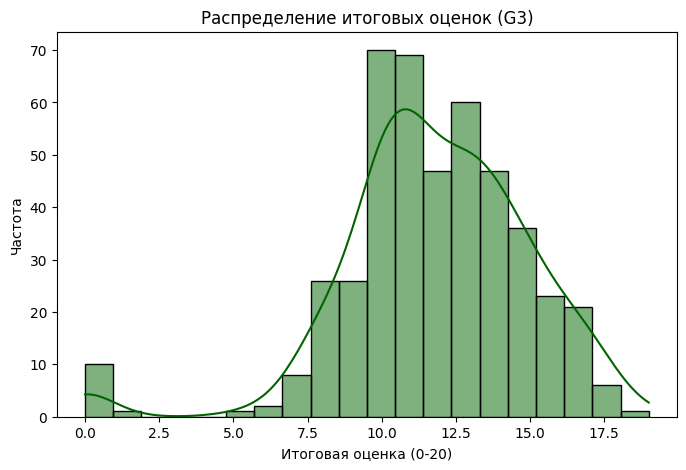

In [473]:
plt.figure(figsize=(8, 5))
sns.histplot(X_train['G3'], bins=20, kde=True, color='darkgreen')
plt.title('Распределение итоговых оценок (G3)')
plt.xlabel('Итоговая оценка (0-20)')
plt.ylabel('Частота')
plt.show()


## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

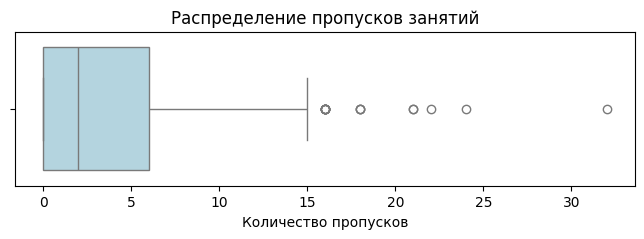

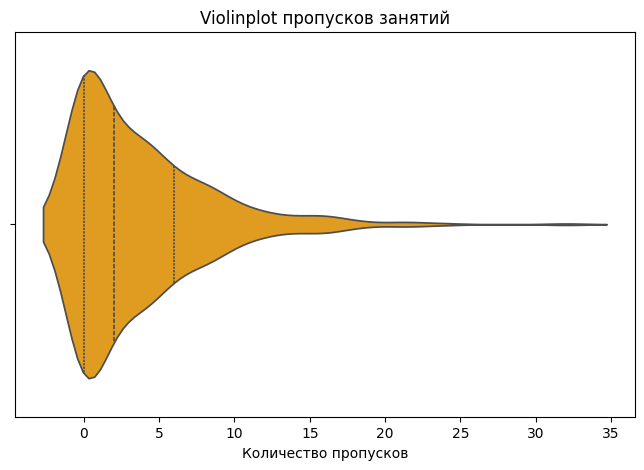

In [474]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=X_train, x='absences', color='lightblue')
plt.title('Распределение пропусков занятий')
plt.xlabel('Количество пропусков')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=X_train, x='absences', inner="quartile", color='orange')
plt.title('Violinplot пропусков занятий')
plt.xlabel('Количество пропусков')
plt.show()


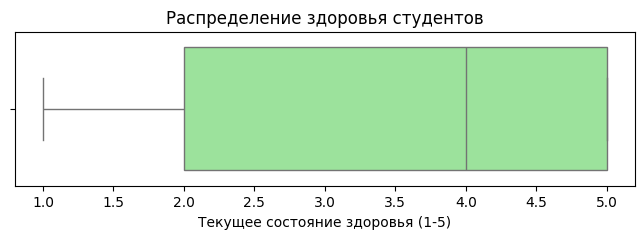

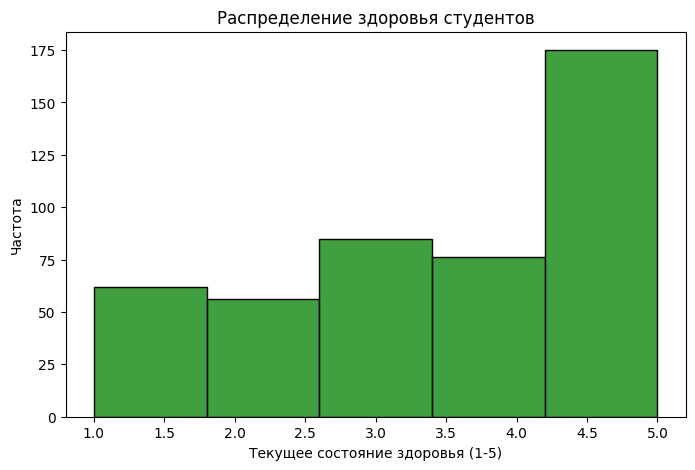

In [475]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=X_train, x='health', color='lightgreen')
plt.title('Распределение здоровья студентов')
plt.xlabel('Текущее состояние здоровья (1-5)')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=X_train['health'], bins=5, kde=False, color='green')
plt.title('Распределение здоровья студентов')
plt.xlabel('Текущее состояние здоровья (1-5)')
plt.ylabel('Частота')
plt.show()


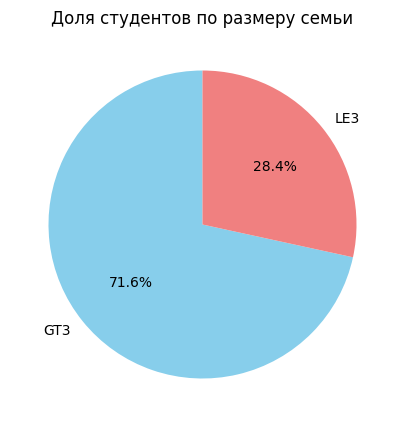

In [476]:
plt.figure(figsize=(8, 5))
X_train['famsize'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Доля студентов по размеру семьи')
plt.ylabel('')
plt.show()
# le3 - less than or equal to 3, gt3 - greater than 3

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_80373/2226039967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=X_train, x='internet', y='G3', palette='muted', inner="quartile")


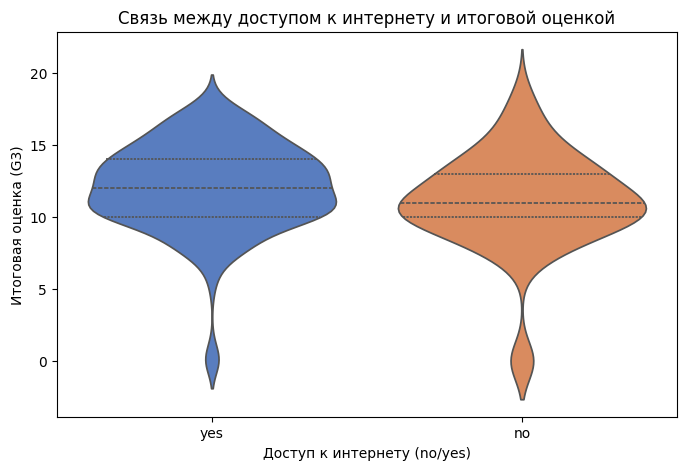

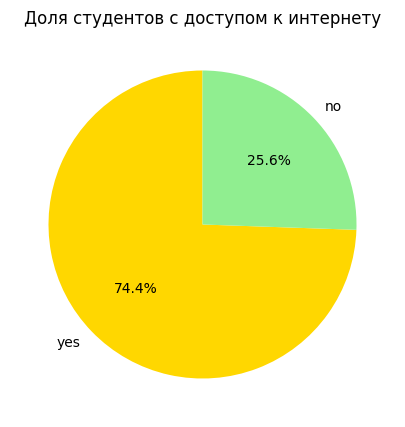

In [477]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=X_train, x='internet', y='G3', palette='muted', inner="quartile")
plt.title('Связь между доступом к интернету и итоговой оценкой')
plt.xlabel('Доступ к интернету (no/yes)')
plt.ylabel('Итоговая оценка (G3)')
plt.show()

plt.figure(figsize=(8, 5))
X_train['internet'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Доля студентов с доступом к интернету')
plt.ylabel('')
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

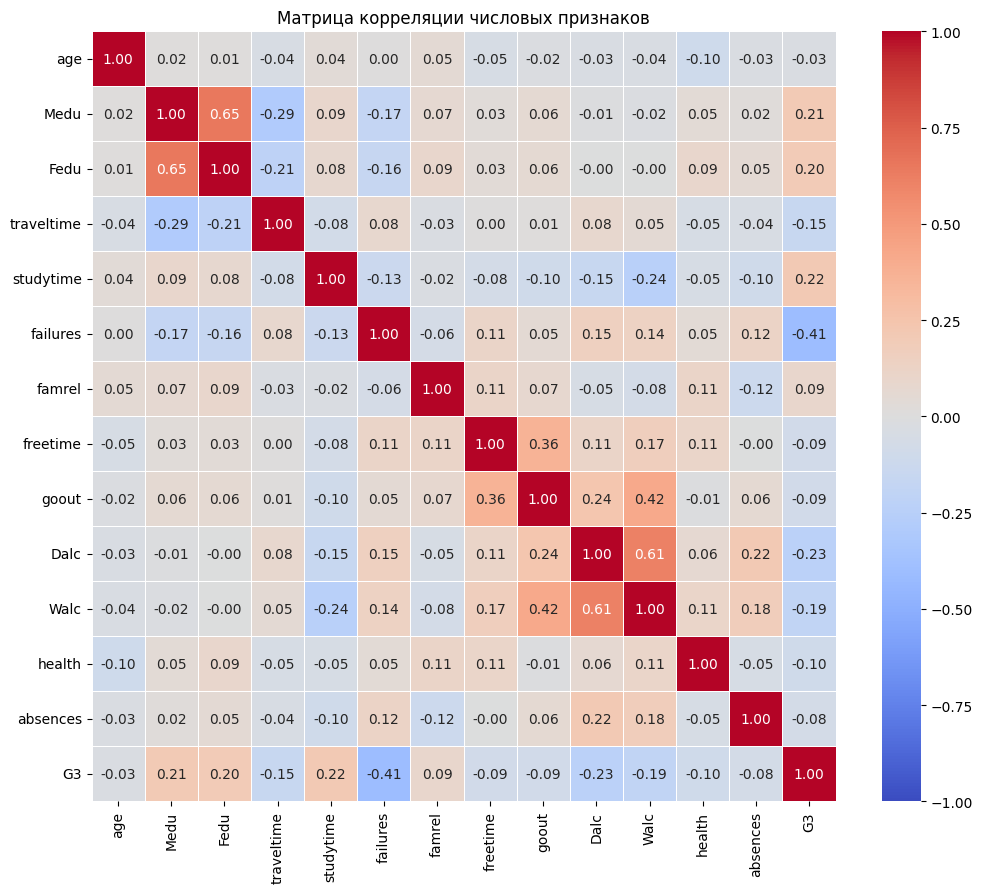

In [478]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64'])

numerical_corr = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Матрица корреляции числовых признаков')
plt.show()


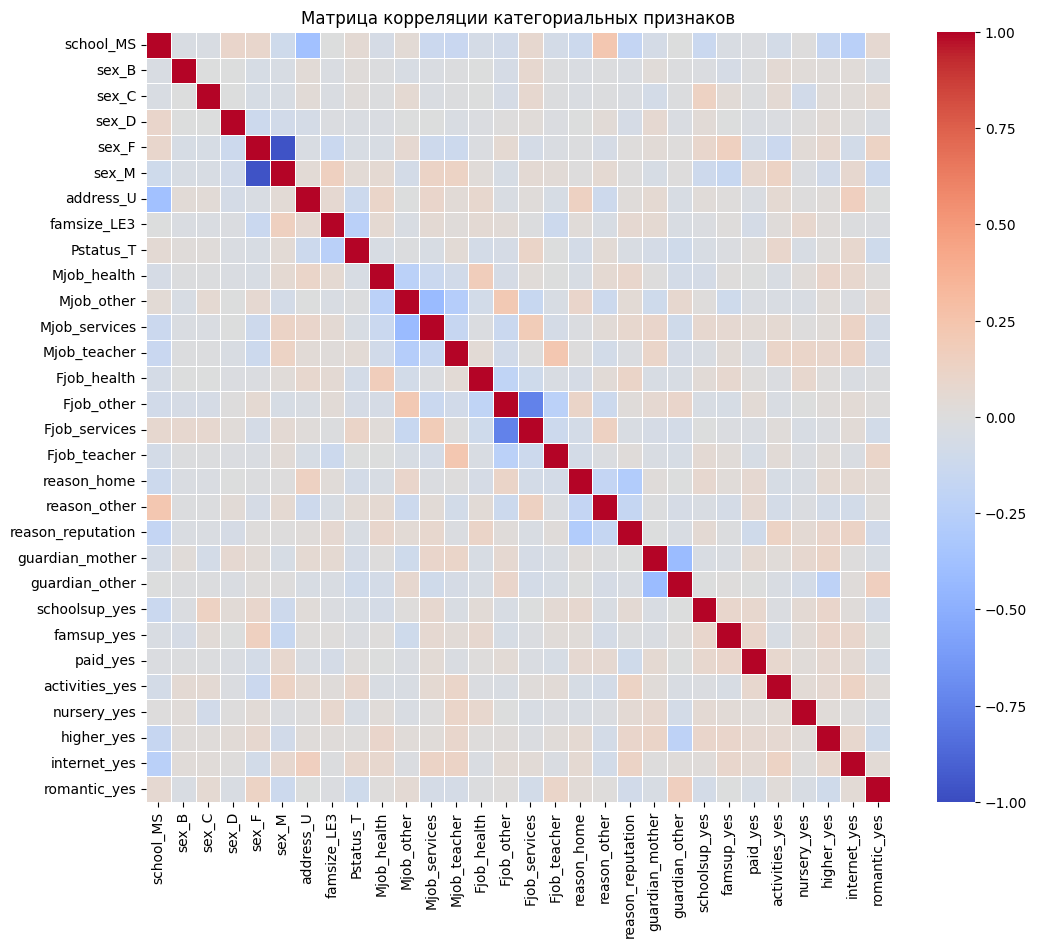

In [479]:
categorical_features = X_train.select_dtypes(include=['object', 'category'])

categorical_encoded = pd.get_dummies(categorical_features, drop_first=True)

categorical_corr = categorical_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(categorical_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Матрица корреляции категориальных признаков')
plt.show()


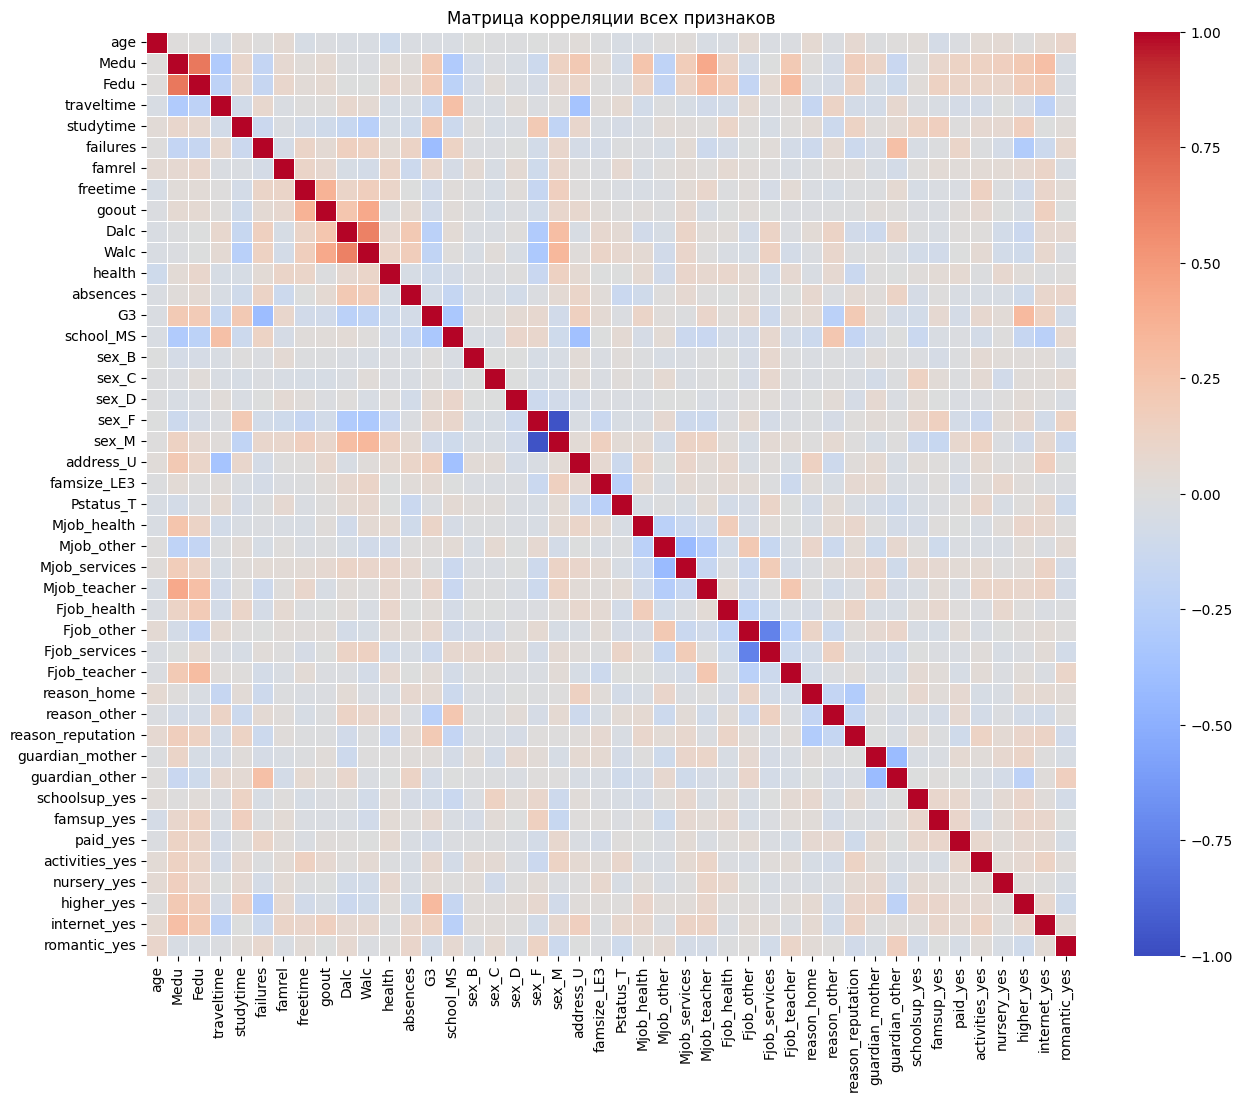

In [480]:
combined_features = pd.concat([numerical_features, categorical_encoded], axis=1)

combined_corr = combined_features.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(combined_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Матрица корреляции всех признаков')
plt.show()

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

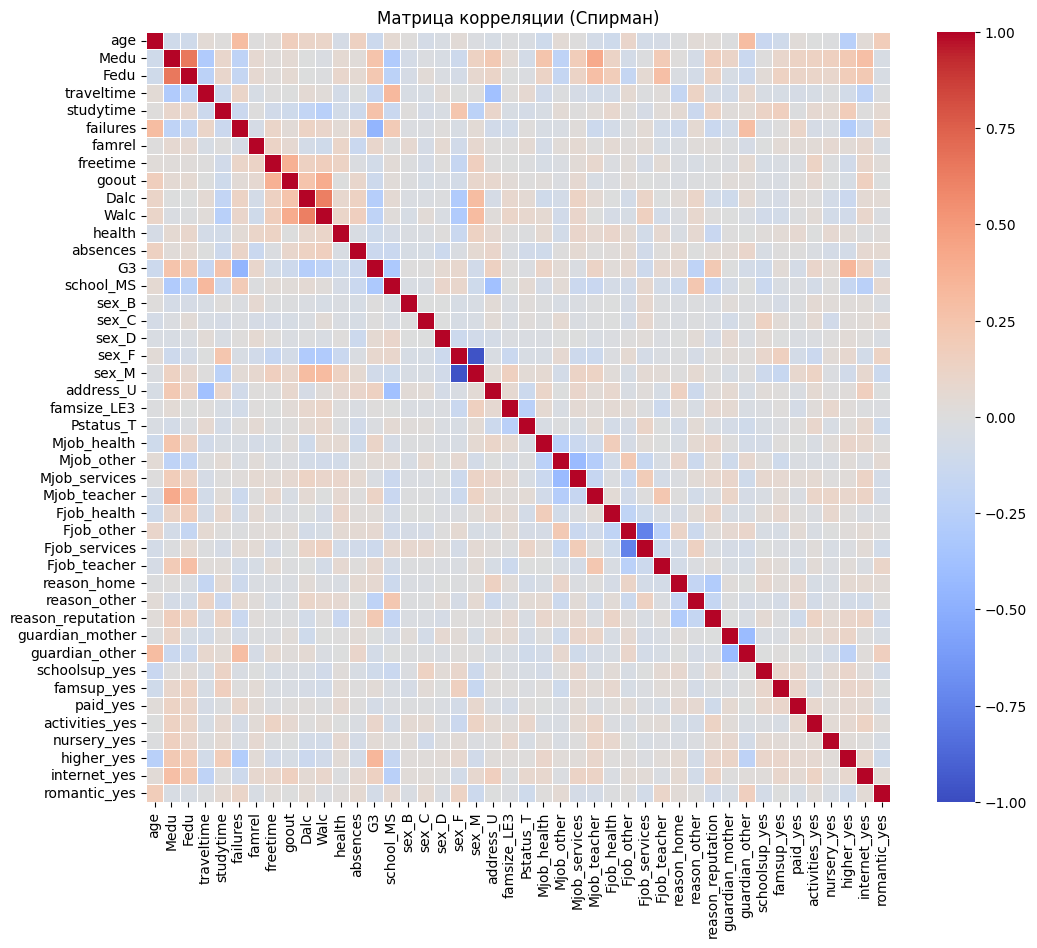

In [481]:
spearman_corr = combined_features.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=False, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Матрица корреляции (Спирман)')
plt.show()


## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [482]:
unique_values = X_train.nunique().sort_values(ascending=False)

print("Число уникальных значений для каждого признака:\n")
unique_values


Число уникальных значений для каждого признака:



absences      22
G3            17
age           16
sex            6
health         5
Walc           5
Medu           5
Fedu           5
Mjob           5
Fjob           5
famrel         5
freetime       5
goout          5
Dalc           5
reason         4
failures       4
studytime      4
traveltime     4
guardian       3
internet       2
romantic       2
school         2
higher         2
nursery        2
activities     2
paid           2
famsup         2
Pstatus        2
famsize        2
address        2
schoolsup      2
dtype: int64

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

sex
F    82
M    49
Name: count, dtype: int64


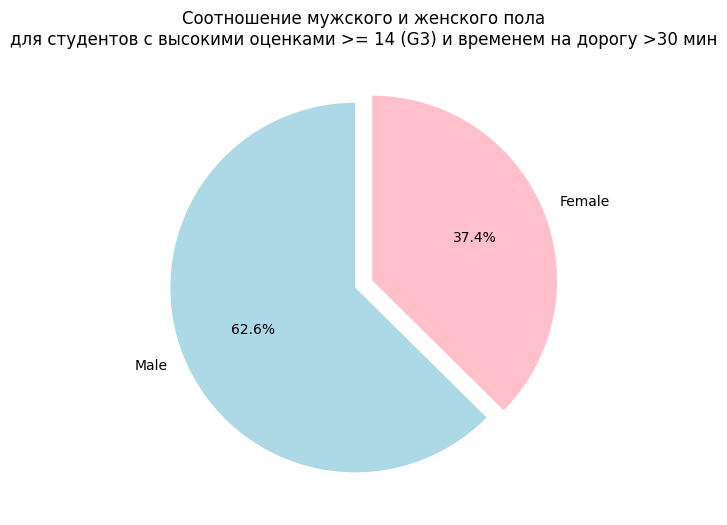

In [483]:
filtered_data = X_train[
    (X_train['traveltime'] > 0.5) & 
    (X_train['G3'] >= X_train['G3'].max() - 5) & 
    (X_train['sex'].isin(['M', 'F']))
]

sex_counts = filtered_data['sex'].value_counts()
print(sex_counts)

plt.figure(figsize=(8, 6))
sex_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'pink'],
    labels=['Male', 'Female'],
    explode=(0.05, 0.05)
)
g3_minus5 = X_train['G3'].max() - 5
plt.title(f'Соотношение мужского и женского пола\nдля студентов с высокими оценками >= {g3_minus5} (G3) и временем на дорогу >30 мин')
plt.ylabel('')
plt.show()


## Построить boxplot для оценок по возрасту.  

/var/folders/5n/x5mny29d1t16fq8lylrw5xn80000gn/T/ipykernel_80373/4054128298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train, x='age', y='G3', palette='coolwarm')


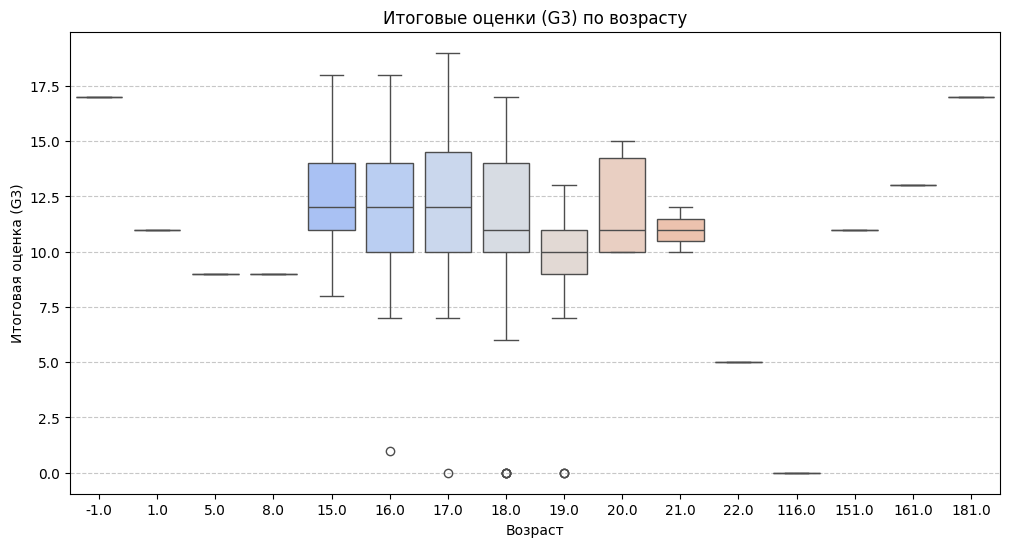

In [484]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train, x='age', y='G3', palette='coolwarm')

plt.title('Итоговые оценки (G3) по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Итоговая оценка (G3)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Найти id топ-5 самых юных отличников.

In [485]:
top_students = X_train[X_train['G3'] >= 18]

top_young_students = top_students.sort_values(by='age', ascending=True)

top_5_young_ids = top_young_students.head(5).index

print("ID топ-5 самых юных отличников:", *top_5_young_ids.tolist(), sep='\n')

X_train.iloc[top_5_young_ids]


ID топ-5 самых юных отличников:
109
151
74
85
221


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
109,GP,M,15.0,U,LE3,T,4,2,teacher,other,...,yes,no,3,5,2,1,1,3,10,18
151,MS,F,16.0,R,LE3,T,1,1,at_home,other,...,no,no,5,3,2,1,1,1,0,18
74,GP,F,17.0,R,LE3,T,3,1,services,other,...,no,no,3,1,2,1,1,3,0,19
85,GP,M,17.0,U,GT3,T,1,0,other,other,...,yes,yes,4,3,2,1,1,3,0,18
221,GP,M,17.0,U,LE3,A,3,2,other,other,...,yes,no,4,4,4,1,2,5,10,18


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [486]:
age_grouped = X_train.groupby('age')['G3'].agg(['min', 'max', 'count']).reset_index()
age_grouped = age_grouped.sort_values(by='count', ascending=False).reset_index(drop=True)

print("Максимальная и минимальная оценка (G3) для каждого возраста:\n")
age_grouped


Максимальная и минимальная оценка (G3) для каждого возраста:



,age,min,max,count
0,17.0,0,19,139
1,16.0,1,18,111
2,18.0,0,17,95
3,15.0,8,18,73
4,19.0,0,13,19
5,20.0,10,15,6
6,21.0,10,12,2
7,-1.0,17,17,1
8,1.0,11,11,1
9,5.0,9,9,1


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

In [487]:
X_train = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22) & (X_train['sex'].isin(['M', 'F']))]


In [488]:
sorted(X_train['age'].unique().tolist())

[15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0]

In [489]:
X_train['sex'].unique()

array(['M', 'F'], dtype=object)

## Удалите скоррелированные данные

In [490]:
corr_matrix = X_train.select_dtypes(include=['int64', 'float64']).corr().abs()

high_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
             if col1 != col2 and corr_matrix.loc[col1, col2] > 0.7]

print("Пары скоррелированных признаков:", high_corr)

# for col1, col2 in high_corr:
#     if col1 in X_train.columns:
#         X_train.drop(columns=[col1], inplace=True)


Пары скоррелированных признаков: []


## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [ ]:
# results = []

# X_train = X_train[(X_train['age'] >= 15) & (X_train['age'] <= 22) & (X_train['sex'].isin(['M', 'F']) & X_train['failures'] >= 1) & (X_train['failures'] <= 4)]

# limits = {
#     'sex': ['F', 'M'],
#     # 'age': (15, 22),
#     'address': ['U', 'R'],
#     'famsize': ['LE3', 'GT3'],
#     'Pstatus': ['T', 'A'],
#     'Medu': (0, 4),
#     'Fedu': (0, 4),
#     'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
#     'Fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
#     'reason': ['home', 'reputation', 'course', 'other'],
#     'guardian': ['mother', 'father', 'other'],
#     'traveltime': (1, 4),
#     'studytime': (1, 4),
#     # 'failures': (1, 4),
#     'schoolsup': ['yes', 'no'],
#     'famsup': ['yes', 'no'],
#     'paid': ['yes', 'no'],
#     'activities': ['yes', 'no'],
#     'nursery': ['yes', 'no'],
#     'higher': ['yes', 'no'],
#     'internet': ['yes', 'no'],
#     'romantic': ['yes', 'no'],
#     'famrel': (1, 5),
#     'freetime': (1, 5),
#     'goout': (1, 5),
#     'Dalc': (1, 5),
#     'Walc': (1, 5),
#     'health': (1, 5),
#     'absences': (0, 93)
# }


In [492]:
missing_data = X_train.isnull().sum()
missing_results = []

for column, missing_count in missing_data.items():
    if missing_count > 0:
        if X_train[column].dtype in ['float64', 'int64']:
            # для числовых медиана
            fill_value = X_train[column].median()
        else:
            # для категориальных мода
            fill_value = X_train[column].mode()[0]

        X_train[column] = X_train[column].fillna(fill_value)
        missing_results.append(
            f"{column} - {missing_count} - Заменено на {'медиану' if X_train[column].dtype in ['float64', 'int64'] else 'моду'} ({fill_value})"
        )
    # else:
    #     missing_results.append(f"{column} - {missing_count} - Пропусков нет")

print(missing_data.sum())
print(*missing_results, sep='\n')


0



In [493]:
print(*X_train.columns.to_list(), sep='\n')

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G3


## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [494]:
X_train['family_support'] = X_train['famrel'] + X_train['famsup'].map({'yes': 1, 'no': 0})

In [495]:
X_train['study_to_travel_ratio'] = X_train['studytime'] / X_train['traveltime']

In [496]:
X_train['avg_alcohol'] = (X_train['Dalc'] + X_train['Walc']) / 2

In [497]:
X_train['home_study_comfort'] = X_train['Medu'] + X_train['Fedu'] + X_train['internet'].map({'yes': 1, 'no': 0})

In [498]:
X_train['stress_level'] = X_train['absences'] + X_train['failures'] + (5 - X_train['health'])

## Закодируйте категориальные признаки

In [499]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [500]:
from sklearn.model_selection import KFold


## Разделите данные и объясните выбор стратегии

In [501]:
X = X_train.drop(columns=['G3'])
y = X_train['G3']

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Фолд {fold + 1}:")
    print(f"  Размеры: обучение {len(train_index)}, тест {len(test_index)}")

Фолд 1:
  Размеры: обучение 350, тест 88
Фолд 2:
  Размеры: обучение 350, тест 88
Фолд 3:
  Размеры: обучение 350, тест 88
Фолд 4:
  Размеры: обучение 351, тест 87
Фолд 5:
  Размеры: обучение 351, тест 87


In [502]:
print(y.value_counts())

G3
10    70
11    67
13    58
14    45
12    44
15    36
8     26
9     23
16    23
17    18
0      9
7      8
18     6
6      2
19     1
1      1
5      1
Name: count, dtype: int64


__Ваш ответ:__
- каждый элемент данных используется для тестирования
- небольшой датасет
- тк KFold разбивает данные случайным образом => не приходится в каждый фолд добавлять редкие данные, как, например, в StratifiedKFold


# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

In [503]:
# странно это делать после кодирования категориальных признаков, сделал выше

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

In [504]:
from sklearn.impute import KNNImputer

missing_features = X_train.columns[X_train.isnull().any()]
print(f"Признаки с пропусками: {missing_features.tolist()}")

X_no_target = X_train.drop(columns=['G3'])

imputer = KNNImputer(n_neighbors=5, weights="uniform")
X_filled = pd.DataFrame(imputer.fit_transform(X_no_target), columns=X_no_target.columns)

print(f"Остаток пропусков:\n{X_filled.isnull().sum()}")


Признаки с пропусками: []
Остаток пропусков:
age                      0
Medu                     0
Fedu                     0
traveltime               0
studytime                0
failures                 0
famrel                   0
freetime                 0
goout                    0
Dalc                     0
Walc                     0
health                   0
absences                 0
family_support           0
study_to_travel_ratio    0
avg_alcohol              0
home_study_comfort       0
stress_level             0
school_MS                0
sex_M                    0
address_U                0
famsize_LE3              0
Pstatus_T                0
Mjob_health              0
Mjob_other               0
Mjob_services            0
Mjob_teacher             0
Fjob_health              0
Fjob_other               0
Fjob_services            0
Fjob_teacher             0
reason_home              0
reason_other             0
reason_reputation        0
guardian_mother          0
guardian_o

In [505]:
X_train.isna().sum().sum()

np.int64(0)

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [506]:
from sklearn.model_selection import train_test_split

X = X_train.drop(columns=['G3'])
y = X_train['G3']
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)


## KNN

In [507]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

best_knn = grid_search.best_estimator_
print(f"Лучший параметр n_neighbors: {grid_search.best_params_}")

y_pred_knn = best_knn.predict(X_test_split)
print(f"Точность KNN: {accuracy_score(y_test_split, y_pred_knn):.4f}")


/Users/nikolayborovets/Desktop/FALT_MIPT/ML/ml_mipt_dafe/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Лучший параметр n_neighbors: {'n_neighbors': 18}
Точность KNN: 0.2045


## Bayes

In [508]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_split, y_train_split)

y_pred_nb = nb.predict(X_test_split)
print(f"Точность Naive Bayes: {accuracy_score(y_test_split, y_pred_nb):.4f}")


Точность Naive Bayes: 0.0795


## Регрессия

In [509]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_split, y_train_split)

y_pred_lr = lr.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred_lr)
print(f"MSE LR: {mse:.4f}")


MSE LR: 5.5583


## SVM

In [510]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search_svr = RandomizedSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)
grid_search_svr.fit(X_train_split, y_train_split)

best_svr = grid_search_svr.best_estimator_
print(f"Лучшие параметры SVM: {grid_search_svr.best_params_}")

y_pred_svr = best_svr.predict(X_test_split)
mse_svr = mean_squared_error(y_test_split, y_pred_svr)
print(f"MSE для SVM: {mse_svr:.4f}")


Лучшие параметры SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
MSE для SVM: 5.2196


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

In [511]:
from sklearn.metrics import mean_squared_error

y_pred_knn = best_knn.predict(X_test_split)
y_pred_nb = nb.predict(X_test_split)
y_pred_lr = lr.predict(X_test_split)
y_pred_svr = best_svr.predict(X_test_split)

# weights = [0.3, 0.2, 0.3, 0.2]
errors = [
    mean_squared_error(y_test_split, y_pred_knn),
    mean_squared_error(y_test_split, y_pred_nb),
    mean_squared_error(y_test_split, y_pred_lr),
    mean_squared_error(y_test_split, y_pred_svr)
]
weights = [1 / e for e in errors]
weights = [w / sum(weights) for w in weights]
print(*weights, sep=', ')

y_pred_combined = (
    weights[0] * y_pred_knn +
    weights[1] * y_pred_nb +
    weights[2] * y_pred_lr +
    weights[3] * y_pred_svr
)

mse_combined = mean_squared_error(y_test_split, y_pred_combined)
print(f"MSE сложной модели: {mse_combined:.4f}")


0.2729619235953784, 0.07712952149689048, 0.3147407767067851, 0.33516777820094606
MSE сложной модели: 4.9377


Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

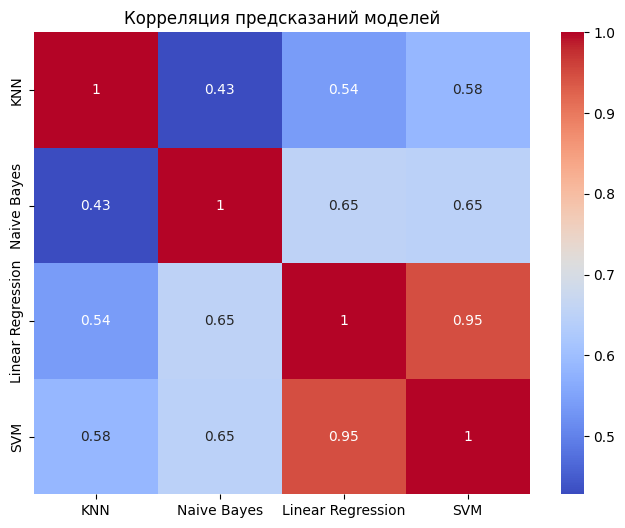

In [512]:
predictions_df = pd.DataFrame({
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_nb,
    'Linear Regression': y_pred_lr,
    'SVM': y_pred_svr
})

correlation_matrix = predictions_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция предсказаний моделей')
plt.show()


In [513]:
from scipy.optimize import minimize

predictions = np.column_stack([y_pred_knn, y_pred_nb, (y_pred_lr + y_pred_svr) / 2])
true_values = y_test_split

def objective_function(weights):
    weights = np.array(weights)
    weights = weights / np.sum(weights)
    
    y_pred_ensemble = np.dot(predictions, weights)
    
    return mean_squared_error(true_values, y_pred_ensemble)

# 0.2729619235953784, 0.07712952149689048, 0.3147407767067851, 0.33516777820094606
initial_weights = [0.27, 0.07, 0.66]

constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
bounds = [(0, 1) for _ in range(predictions.shape[1])]

result = minimize(objective_function, initial_weights, bounds=bounds, constraints=constraints)

optimal_weights = result.x
print(f"Оптимальные веса: {optimal_weights}")

y_pred_final = np.dot(predictions, optimal_weights)
mse_final = mean_squared_error(true_values, y_pred_final)
print(f"Оптимизированный MSE финальной модели: {mse_final:.4f}")


Оптимальные веса: [0.32613861 0.02541215 0.64844924]
Оптимизированный MSE финальной модели: 4.8782


## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [514]:
X_test = pd.read_csv('X_test.csv')

In [515]:
X_test['family_support'] = X_test['famrel'] + X_test['famsup'].map({'yes': 1, 'no': 0})
X_test['study_to_travel_ratio'] = X_test['studytime'] / X_test['traveltime']
X_test['avg_alcohol'] = (X_test['Dalc'] + X_test['Walc']) / 2
X_test['home_study_comfort'] = X_test['Medu'] + X_test['Fedu'] + X_test['internet'].map({'yes': 1, 'no': 0})
X_test['stress_level'] = X_test['absences'] + X_test['failures'] + (5 - X_test['health'])


categorical_columns_test = X_test.select_dtypes(include=['object', 'category']).columns
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns_test, drop_first=True)
# X_test_encoded = pd.get_dummies(X_test, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 
#                                                  'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
#                                                  'famsup', 'paid', 'activities', 'nursery', 'higher', 
#                                                  'internet', 'romantic'], drop_first=True)

y_pred_knn_test = best_knn.predict(X_test_encoded)
y_pred_nb_test = nb.predict(X_test_encoded)
y_pred_lr_test = lr.predict(X_test_encoded)
y_pred_svr_test = best_svr.predict(X_test_encoded)

optimal_weights = result.x

predictions_test = np.column_stack([
    y_pred_knn_test, 
    y_pred_nb_test, 
    (y_pred_lr_test + y_pred_svr_test) / 2
])
y_pred_final_test = np.dot(predictions_test, optimal_weights)

y_pred_final_test = np.round(y_pred_final_test).astype(int)

submission = pd.read_csv('data/sample_submission.csv')
submission['G3'] = y_pred_final_test

submission.to_csv('data/submission.csv', index=False)


In [516]:
# # Для jupyter notebook

# submission = pd.read_csv('data/sample_submission.csv', index_col='id')
# submission['G3'] = 1 # ваше предсказание
# submission.to_csv('data/submission.csv', index=False)

In [517]:
# # Для colab notebook

# from google.colab import files

# pd.read_csv('data/sample_submission.csv', index_col='id')
# submission['G3'] = 1 # ваше предсказание
# submission.to_csv('data/submission.csv', index=False)
# files.download('data/submission.csv')

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.